<a href="https://colab.research.google.com/github/priya1804/THE-PIMA-INDIAN-DIABETES-DATABASE/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Load the Pima Indian Diabetes Dataset
dataset = pd.read_csv("diabetes.csv")
X = dataset.iloc[:, :-1].values  # All features except the last column (Outcome)
y = dataset.iloc[:, -1].values   # The target column (Outcome)

In [5]:
# Select only two features for visualization (e.g., Glucose and BMI)
X_selected = X[:, [1, 5]]  # Column 1 is Glucose, Column 5 is BMI

In [6]:

# Split the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Instantiate and train the Gaussian Naive Bayes classifier with only the selected features
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)


In [10]:
# Evaluate the model using a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[102  11]
 [ 21  20]]


In [11]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7922


In [12]:
# Visualising the Training set results for the selected two features
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

In [13]:
# Create meshgrid for plotting
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

<ipython-input-18-71b53557ce05>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


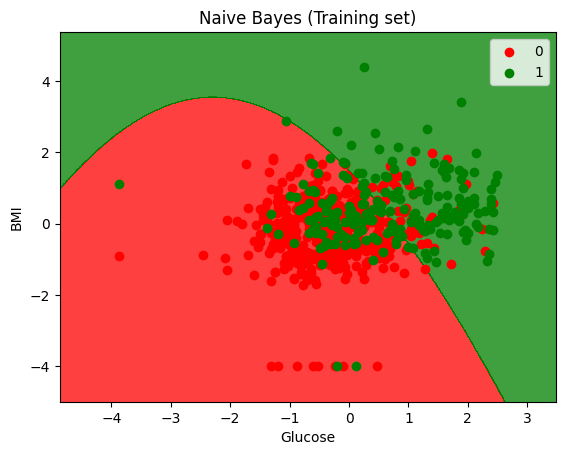

In [18]:
# Plot decision boundaries for the classifier
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['red', 'green']))

# Visualize data points (Glucose vs BMI in this example)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(['red', 'green'])(i), label = j)

# Title and labels
plt.title('Naive Bayes (Training set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()